## **Watermarking Tool (Membuat Lisensi Gambar)**

**Disini saya Ari akan membuat contoh tools A.I. yang berguna untuk para *konten kreator medsos*, untuk antisipasi pembajakan dalam postingan gambar produknya.**

**Disini saya menggunakan gambar produk pizza dari dominos dan gambar logo asli milik dominos pizza. yang akan menghasilkan 2 disain watermark, yaitu**



**1. Watermark Gambar Logo**

**2.   Watermark Tulisan**


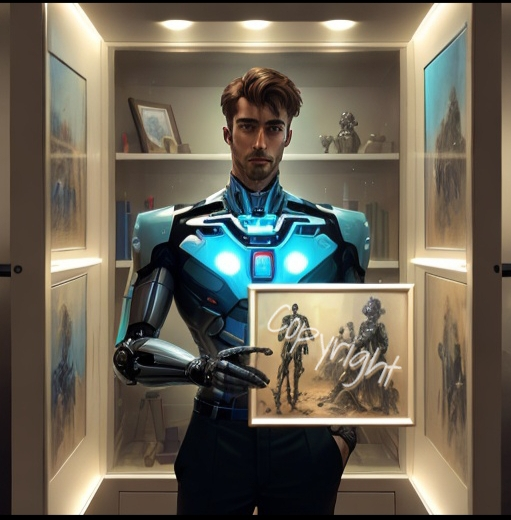






In [ ]:
pip install pillow numpy opencv-python

In [ ]:
import requests
from PIL import Image
import numpy as np
import cv2


# **Menyisipkan Gambar Produk & Logo Resmi**

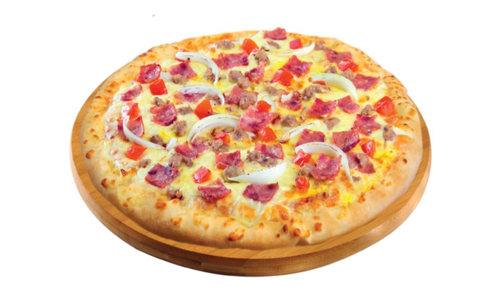

In [ ]:
# Gambar Produk
img = Image.open(requests.get('https://www.blibli.com/friends-backend/wp-content/uploads/2023/07/Rekomendadi-Menu-Dominos-Pizza-Best-Seller-American-Classic-Cheeseburger-scaled.jpg', stream=True).raw)
img.resize((500, 300))


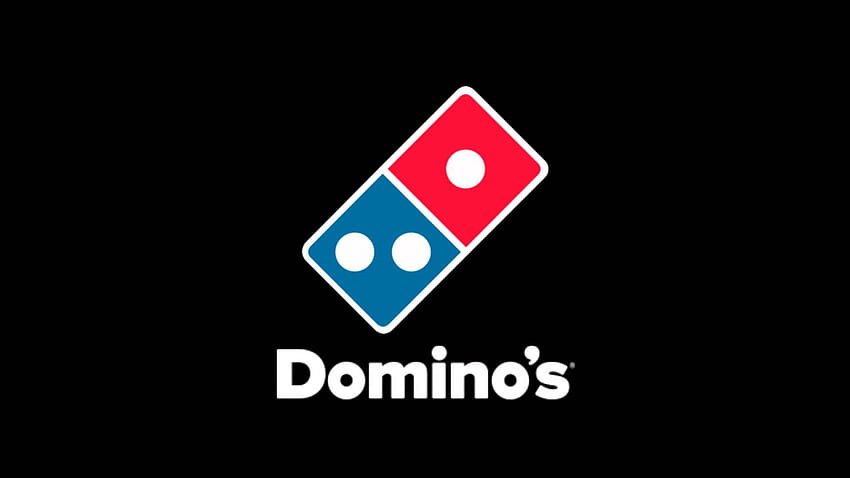

In [ ]:
# Logo Resmi (Usahakan Background Warna Hitam)
wm_img = Image.open(requests.get('https://e1.pxfuel.com/desktop-wallpaper/490/128/desktop-wallpaper-dominos-logos-dominos-pizza.jpg', stream=True).raw)
wm_img = wm_img.convert('RGB')
wm_img


# **Mengubah Gambar ke Variable/arrays**

In [ ]:
img = np.array(img)
img_2 = img.copy()
wm_img = np.array(wm_img)


# **Menentukan ROI (Region of Interest) dalam gambar Logo**

In [ ]:
img_h, img_w, _ = img.shape
wm_img_h, wm_img_w, _ = wm_img.shape

top_y = int(img_h / 2) - int(wm_img_h / 2)
left_x = int(img_w / 2) - int(wm_img_w / 2)
bottom_y = top_y + wm_img_h
right_x = left_x + wm_img_w

roi = img[top_y: bottom_y, left_x: right_x]


# **Mengganti ROI dengan Watermark**

In [ ]:
wm_img = cv2.addWeighted(roi, 1, wm_img, 2, 2)
img[top_y: bottom_y, left_x: right_x] = wm_img


# **Hasil**

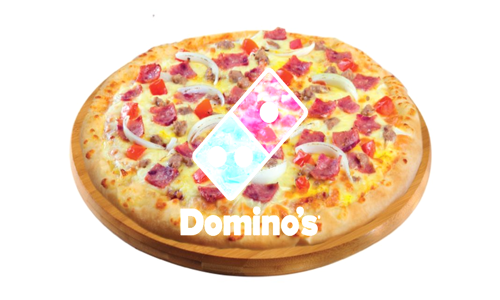

In [ ]:
img = Image.fromarray(img)
img.resize((500, 300))


# **Text Watermark**

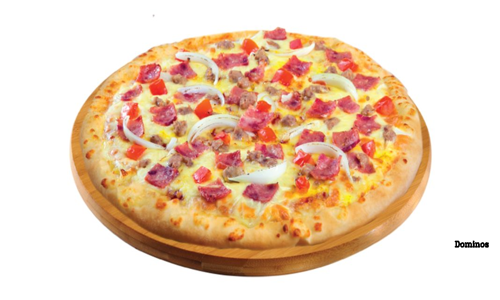

In [ ]:
cv2.putText(img_2, text='Dominos', org=(img_w - 97, img_h - 100), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=(0, 0, 0), thickness=2, lineType=cv2.LINE_4)
img_2 = Image.fromarray(img_2)
img_2.resize((500, 300))
